In [106]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [107]:
# Fonction pour afficher les couleurs dominantes sous forme de barres et les analyser
def display_color_bar_and_analysis(dominant_colors, labels):
    # Créer une barre vide
    bar_height = 20  # Hauteur de chaque barre
    bar_width = 30 * len(dominant_colors)  # Largeur totale de la barre
    bar = np.zeros((bar_height, bar_width, 3), dtype='uint8')
    
    start = 0
    # Remplir la barre avec les couleurs dominantes, chaque couleur a 30 pixels de large
    for i, color in enumerate(dominant_colors):
        start_x = i * 30  # Début du segment
        end_x = start_x + 30  # Fin du segment
        bar[:, start_x:end_x] = color

    # Afficher la barre
    plt.figure(figsize=(8, 2))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(bar, cv2.COLOR_LAB2RGB))
    plt.show()

In [108]:
# Charger l'image
image = cv2.imread('img.png')

In [109]:
# Convertir en espace de couleur LAB
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

In [110]:
# Redimensionner l'image pour faciliter le traitement
image_lab_small = cv2.resize(image_lab, (100, 100))

In [111]:
# Réorganiser l'image en tableau de pixels
pixels = image_lab_small.reshape(-1, 3)

In [112]:
# Appliquer K-means pour trouver les couleurs dominantes
kmeans = KMeans(n_clusters=5)
kmeans.fit(pixels)
dominant_colors = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_

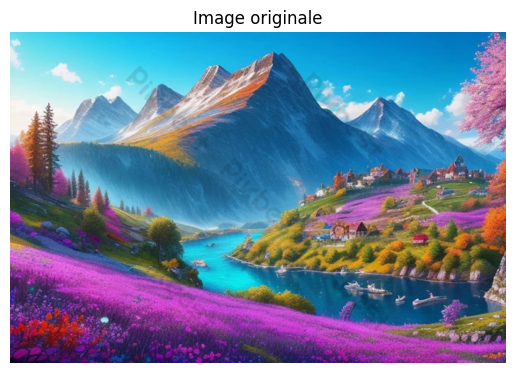

In [113]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image originale")
plt.axis('off')
plt.show()

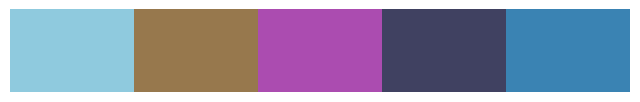

In [114]:
# Afficher les couleurs dominantes sous forme de barre et analyser
display_color_bar_and_analysis(dominant_colors, labels)